In [18]:

import matplotlib.pyplot as plt
import numpy as np
import glob

In [19]:
def plotMap(dataDir, segBegin=0, segEnd=0, tra_length=0):
    # 获取路径下文件夹下个数
    path_file_number=glob.glob(pathname='{}*.csv'.format(dataDir))
    if segEnd == 0:
        segEnd = len(path_file_number) - 1
    tra = np.loadtxt("{}tra.csv".format(dataDir), delimiter=",", dtype="double")
    for index in range(segBegin, segEnd):
        filename = '{}segment_{}.csv'.format(dataDir, index)
        data = np.loadtxt(filename, delimiter=",", dtype="double")
        xpoint = data[:,0]
        ypoint = data[:,1]
        cos = data[:, 2]
        sin = data[:, 3]
        lLength = data[:, 5]
        rLength = data[:, 7]
        # left boundary
        l_b_x = xpoint - lLength*sin
        l_b_y = ypoint + lLength*cos
        # right boundary
        r_b_x = xpoint + rLength*sin
        r_b_y = ypoint - rLength*cos
        if tra_length == 0:
            plt.plot(tra[:, 0], tra[:, 1], color='r')   # 轨迹
        else:
            plt.plot(tra[:tra_length, 0], tra[:tra_length, 1], color='r')

        plt.plot(xpoint, ypoint, color='g', linestyle='--')   # 中心线
        plt.plot(l_b_x, l_b_y, color='b')
        plt.plot(r_b_x, r_b_y, color='b')

    plt.show()

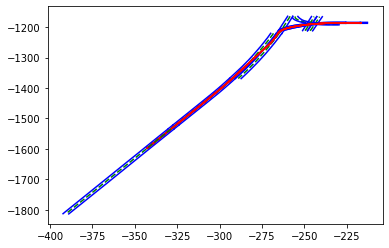

In [21]:
# dataDir = "../prediction/bag/"
dataDir = "./data/bag_3/"

plotMap(dataDir=dataDir, segBegin=0, segEnd=0, tra_length=0)

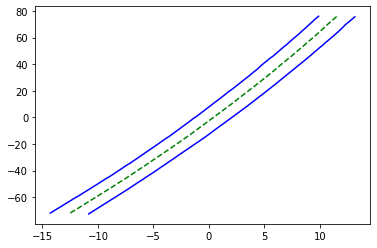

In [15]:
filename = './data/bag_3/segment_10.csv'
tra = np.loadtxt(filename, delimiter=",", dtype="double")
xpoint = tra[:,0] - np.average(tra[:,0])
ypoint = tra[:,1] - np.average(tra[:,1])
cos = tra[:, 2]
sin = tra[:, 3]
lLength = tra[:, 5]
rLength = tra[:, 7]
# left
l_b_x = xpoint - lLength*sin
l_b_y = ypoint + lLength*cos
# right
r_b_x = xpoint + rLength*sin
r_b_y = ypoint - rLength*cos

plt.plot(xpoint, ypoint, color='g', linestyle='--')
plt.plot(l_b_x, l_b_y, color='b')
plt.plot(r_b_x, r_b_y, color='b')
plt.show()

In [12]:
filename = './data/bag_3/segment_11.csv'
tra = np.loadtxt(filename, delimiter=",", dtype="double")
point = tra[:, :2].T
print(point.shape)

(2, 88)
(88, 2)


In [22]:
D_X = [1, 1, 0, -0.5, 1.5, 3, 4, 4.2, 4]
D_Y = [0, 1, 2,    3, 4, 3.5, 3, 2.5, 2]
D = [D_X, D_Y]
ma = np.array(D);
print(ma.shape)

(2, 9)


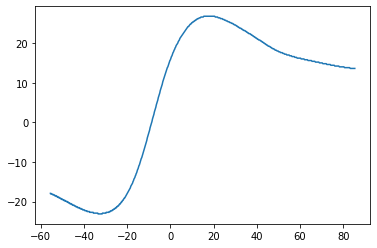

In [38]:
dataDir = './data/bag_2/'
tra = np.loadtxt("{}tra.csv".format(dataDir), delimiter=",", dtype="double")
xpoint = tra[:,0] - np.average(tra[:,0])
ypoint = tra[:,1] - np.average(tra[:,1])
ypoint *= 20    # 减去均值并把y轴扩大20倍
plt.plot(xpoint, ypoint)

In [30]:
def reducePoint(tra, step):
    """
    对轨迹点精简处理
    tra: 轨迹点 numpy (Num, 2)
    step: 缩小倍数
    """
    length = tra.shape[0]
    res = []
    for i in range(0, length, step):
        res.append(tra[i, :])
    return res
    

In [36]:
tra = np.arange(20).reshape(10,-1)
print(tra.shape)
tra = reducePoint(tra, step=2)
tra = np.array(tra)
print(tra)

(10, 2)
[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]
 [16 17]]


In [39]:
import BSpline.parameter_selection as ps

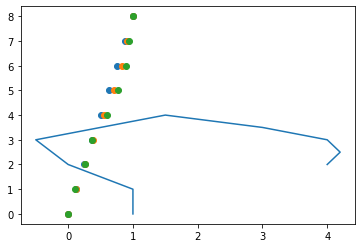

In [49]:
D_X = [1, 1, 0, -0.5, 1.5, 3, 4, 4.2, 4]
D_Y = [0, 1, 2, 3, 4, 3.5, 3, 2.5, 2]
D = [D_X, D_Y]
D_N = len(D_X)

plt.plot(D_X, D_Y)

axis = np.arange(start=0, stop=9)

uniform = ps.uniform_spaced(D_N)
plt.scatter(uniform, axis)
centripetal = ps.centripetal(D_N, D)
plt.scatter(centripetal, axis)
chord_length = ps.chord_length(D_N, D)
plt.scatter(chord_length, axis)
